# Vismay Devjee

## Project

## Task- 2 : Prediction using Unsupervised ML

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline

### Load Dataset

In [2]:
iris=pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Read & Filter Data

In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Changing names of Species name to digits 

In [8]:
label=LabelEncoder()
iris["Species"]=label.fit_transform(iris["Species"])

In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
species_id = iris["Species"].unique()
print("Specie label: ",species_id)

Specie label:  [0 1 2]


### Visualizing Data

#### i. _Scatterplot distinguished by Species_

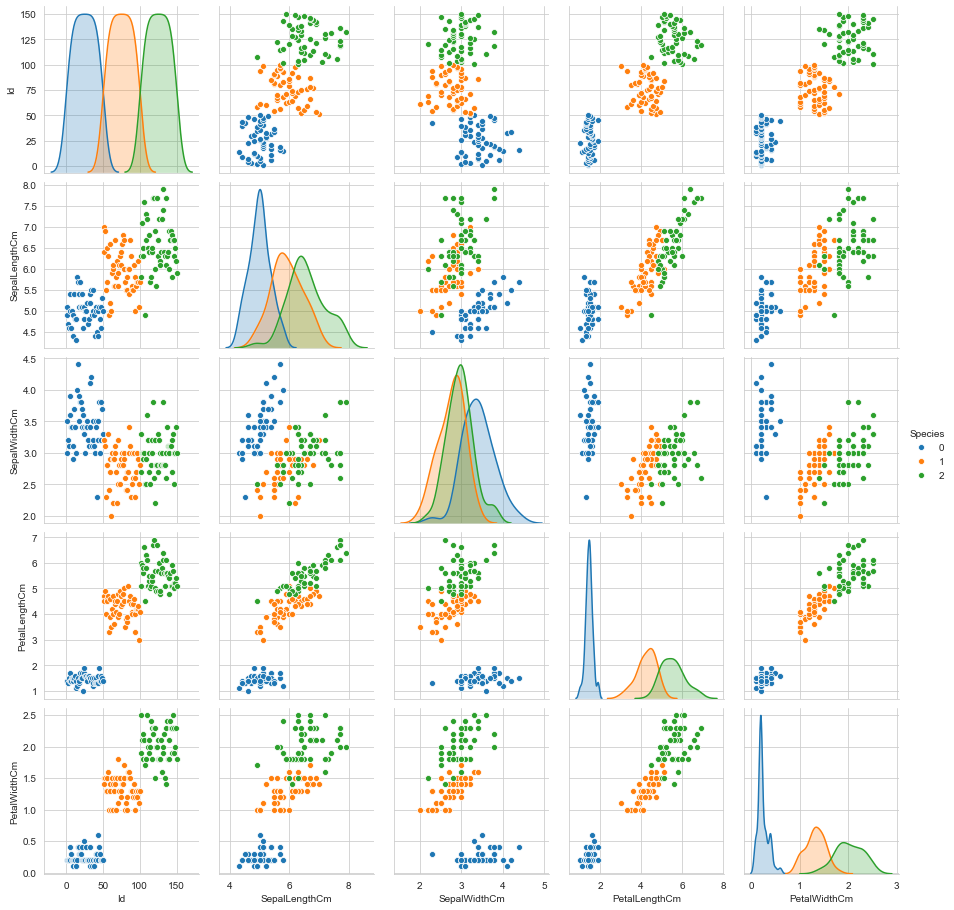

In [11]:
sns.pairplot(data=iris,hue='Species')

#### ii. _Comparing Dimension with respect to species_

Text(0.5, 1.0, 'Scatter Plot: Sepal Width vs Sepal Lenght(cm)')

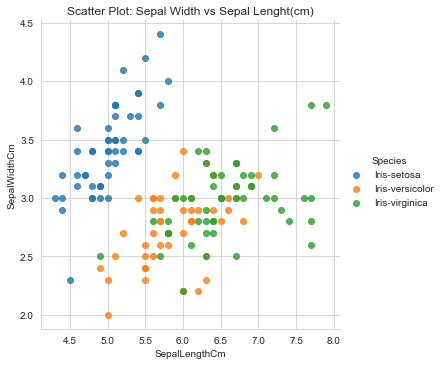

In [6]:
sns.set_style('whitegrid')
sns.lmplot(y='SepalWidthCm',x='SepalLengthCm',data=iris,fit_reg=False,hue='Species')
plt.title("Scatter Plot: Sepal Width vs Sepal Lenght(cm)")


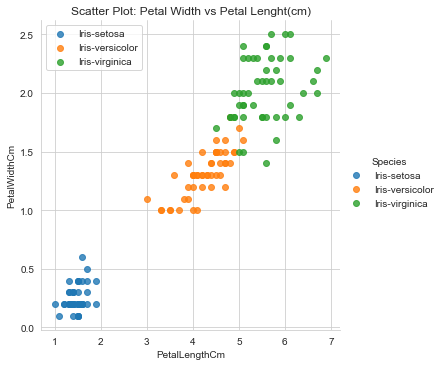

In [7]:
sns.set_style('whitegrid')
sns.lmplot(y='PetalWidthCm',x='PetalLengthCm',data=iris,fit_reg=False,hue='Species')
plt.title("Scatter Plot: Petal Width vs Petal Lenght(cm)")
plt.legend()

#### Creating Data Frame of Dimensions

In [12]:
df_dim=iris.iloc[:,0:5]
df_dim.drop("Id",axis=1,inplace=True)
df_dim

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
from sklearn import preprocessing 
X=iris.iloc[:,:-1].values

### The Elbow Method

In [17]:
wcss = []
for i in range(1,15): 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X) 
    wcss.append(kmeanModel.inertia_)
print(wcss)

[281918.32439999987, 70616.29893333331, 31326.886800000007, 17813.243575974757, 11441.17861957731, 7900.68990897436, 5904.345458498022, 4565.814608875131, 3583.6976552287583, 2959.176884803921, 2466.4547293956048, 2094.0325000000007, 1799.847370629371, 1569.972727272727]


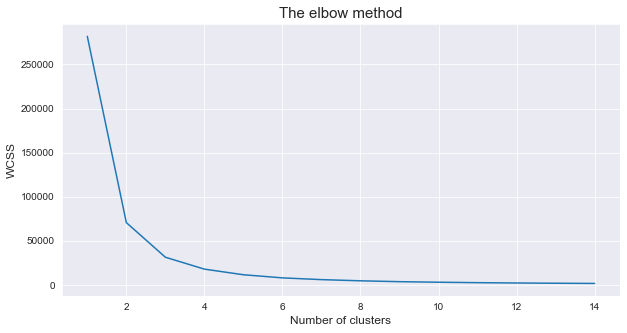

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss)
plt.title('The elbow method',size=15)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('WCSS',size=12) # Within cluster sum of squares
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3)
classifier=kmeans.fit_predict(X)

df=iris.copy()
df['Cluster']=classifier
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1


## Visualizing Cluster 

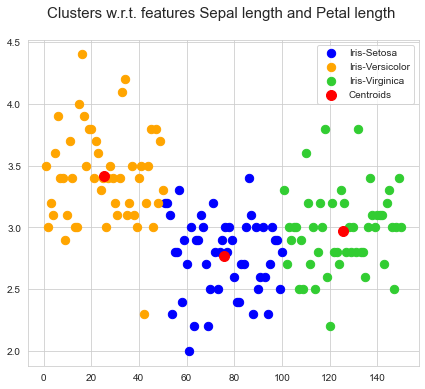

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Petal length \n',size=15)

plt.scatter(X[classifier==0,0],X[classifier==0,2],s=70,c='blue',label='Iris-Setosa')
plt.scatter(X[classifier==1,0],X[classifier==1,2],s=70,c='orange',label='Iris-Versicolor')
plt.scatter(X[classifier==2,0],X[classifier==2,2],s=70,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='red',label='Centroids')

plt.legend()
plt.show()